<h1>Disclaimer</h1>
<p>This notebook analyzes a single database containing information about symptoms related to diabetes. This is a public database sourced from the internet and its data or insights does not represent official medical results that can be used in real-life studies.  However, the following hypotheses and processes are carefully planned and coded to offer a high-quality data science example work.</p>

<h1>Introduction</h1>
<p>The purpose of this data science project is to develop an algorithm capable of predicting the presence of diabetes in new patients based on their medical tests and personal symptoms.</p>
<p>We also aim to uncover additional insights throughout the project that could be valuable to the medical field.</p>

<h2>Research Methodology</h2>
<p>The following outlines the primary steps undertaken in this investigation:</p>
<ol>
    <li>Loading and analyzing the dataset structure.
        <ol>
            <li>Imports</li>
            <li>Data</li>
        </ol>
    </li>
    <li>Exploratory Data Analysis (EDA).</li>
        <ol>
            <li>EDA insights</li>
        </ol>
    <li>Data preparation
        <ol>
            <li>Encoding categorical data</li>
            <li>Standardizing the data</li>
            <li>Studying outliers</li>
            <li>Identifying principal features</li>
            <li>Reducing dimensionality</li>
            <li>Splitting the data</li>
        </ol>
    </li>
    <li>Model development
        <ol>
            <li>Logistic Regression Model
            <li>Decision Tree Model
            <li>Random Forest Model
            <li>SVM Model
            <li>K-NN Model
        </ol>
    </li>
    <li>Evaluation
        <ol>
            <li>Calculating metrics</li>
            <li>Generating charts</li>
            <li>Deriving insights</li>
            <li>Model selection
        </ol>
    </li>
    <li>Making predictions</li>
    <li>Drawing conclusions</li>
</ol>

<h1>1. Loading and analyzing the dataset structure.</h1>
<p>The primary objective of this phase is to load the dataset and analyze its structure to gain an initial understanding of how to handle the data in subsequent phases.</p>

<h3>Imports</h3>

In [1]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

<h3>Data</h3>

In [2]:
'''
Diabetes dataset loaded from a csv file
'''

df = pd.read_csv('diabetes.csv')
df.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [3]:
'''
View of the dataset's columns object types.
'''

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [4]:
'''
Check for missing values in the dataset.
'''

df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

<Axes: >

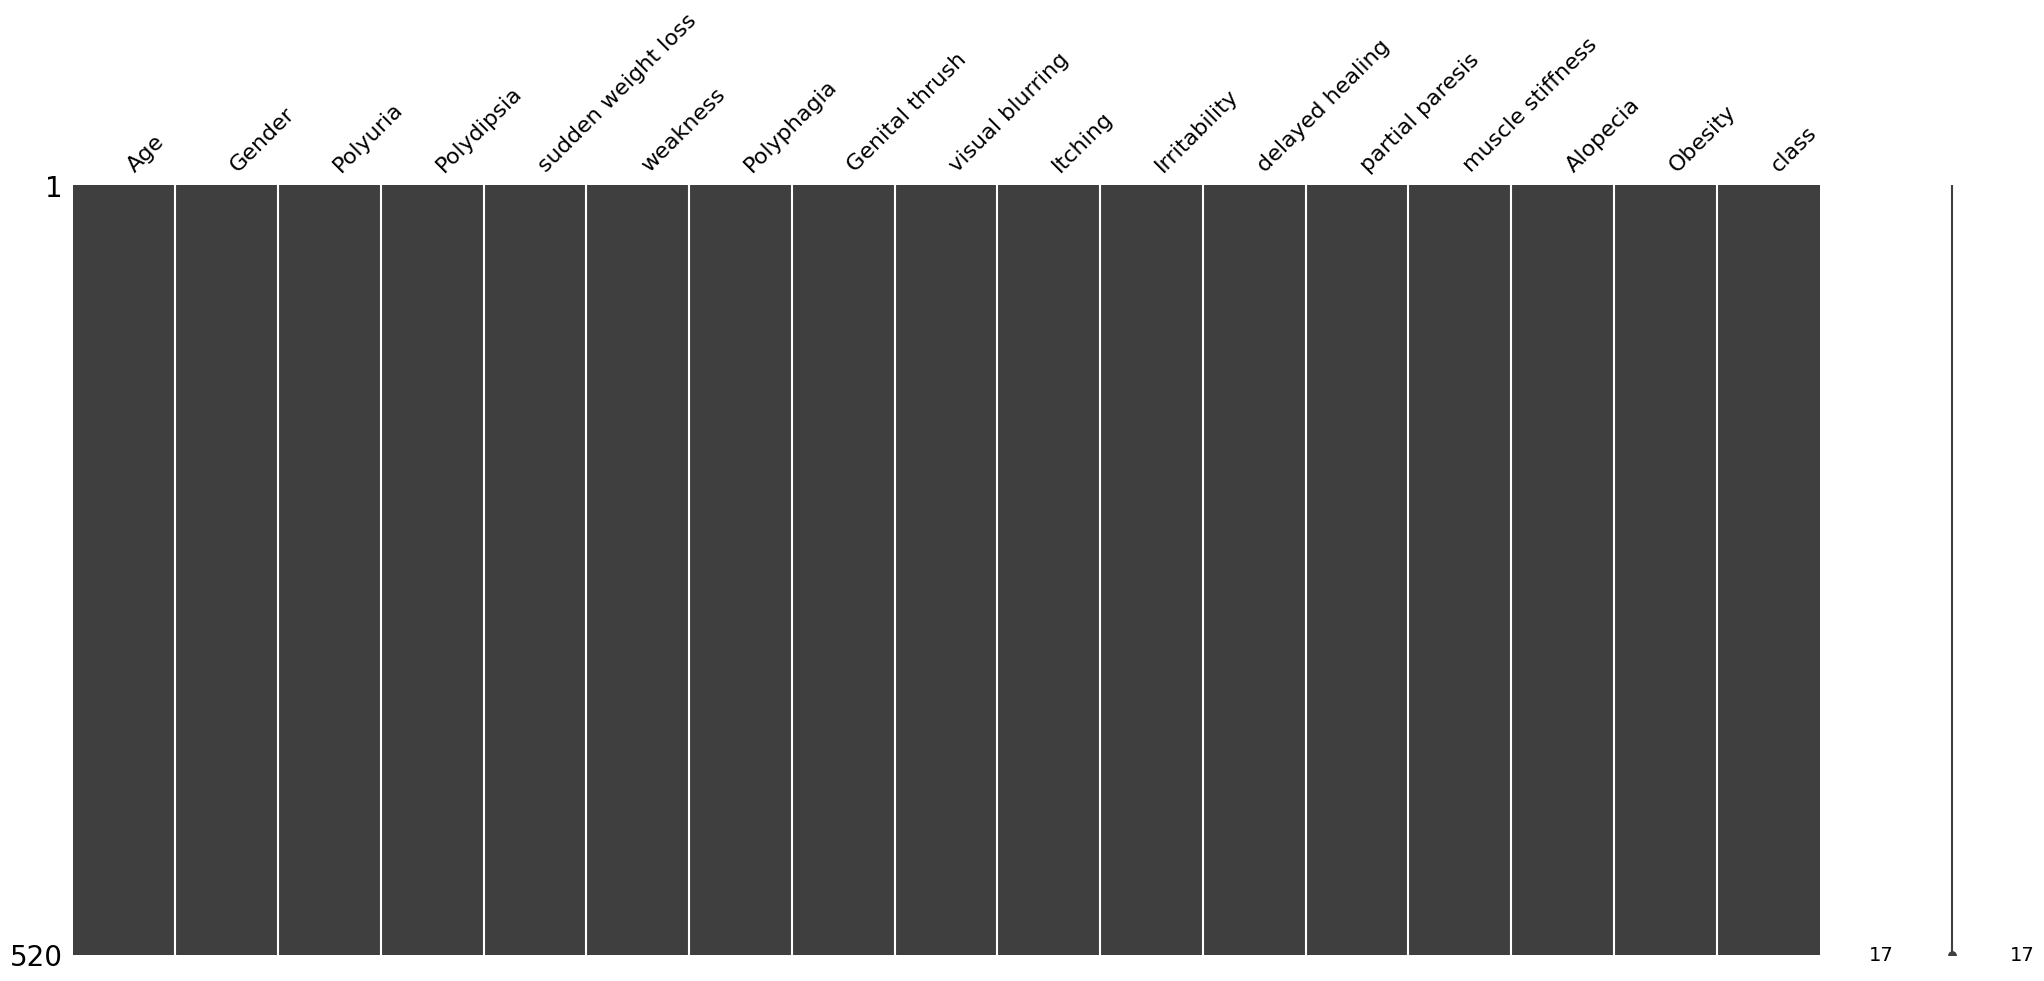

In [5]:
'''
Chart of missing values in the dataset.

White color = Missing values
Gray color = Non-missing values
'''

msno.matrix(df)

In [6]:
'''
The dataset is turned into a dummie dataset to be able to use it in 
the EDA phase.
'''

df_dummie = pd.get_dummies(df, drop_first=True)
df_dummie.columns = df.columns
df_dummie.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,True,False,True,False,True,False,False,False,True,False,True,False,True,True,True,True
1,58,True,False,False,False,True,False,False,True,False,False,False,True,False,True,False,True
2,41,True,True,False,False,True,True,False,False,True,False,True,False,True,True,False,True
3,45,True,False,False,True,True,True,True,False,True,False,True,False,False,False,False,True
4,60,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True


<p>Dependent variables = ['Class']</p>
<p>Independent variable = ['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity']</p>

<p>No additional basic data management was required as the dataset is naturally complete.</p>

<h1>2. Exploratory Data Analysis (EDA)</h1>
<p>The main purpose of this phase is to code initial manipulations to gain preliminary insights into the scientific information hidden within the data.</p>

In [7]:
'''
Variables correlation chart.
'''

corr = df_dummie.corr()
corr

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
Age,1.000000,0.062872,0.199781,0.137382,0.064808,0.224596,0.315577,0.096519,0.402729,0.296559,0.201625,0.257501,0.232742,0.307703,0.321691,0.140458,0.108679
Gender,0.062872,1.000000,-0.268894,-0.312262,-0.281840,-0.124490,-0.219968,0.208961,-0.208092,-0.052496,-0.013735,-0.101978,-0.332288,-0.090542,0.327871,-0.005396,-0.449233
Polyuria,0.199781,-0.268894,1.000000,0.598609,0.447207,0.263000,0.373873,0.087273,0.235095,0.088289,0.237740,0.149873,0.441664,0.152938,-0.144192,0.126567,0.665922
Polydipsia,0.137382,-0.312262,0.598609,1.000000,0.405965,0.332453,0.316839,0.028081,0.331250,0.128716,0.203446,0.115691,0.442249,0.180723,-0.310964,0.098691,0.648734
sudden weight loss,0.064808,-0.281840,0.447207,0.405965,1.000000,0.282884,0.243511,0.089858,0.068754,-0.004516,0.140340,0.088140,0.264014,0.109756,-0.202727,0.169294,0.436568
weakness,0.224596,-0.124490,0.263000,0.332453,0.282884,1.000000,0.180266,0.027780,0.301043,0.309440,0.146698,0.335507,0.272982,0.263164,0.090490,0.045665,0.243275
Polyphagia,0.315577,-0.219968,0.373873,0.316839,0.243511,0.180266,1.000000,-0.063712,0.293545,0.144390,0.239466,0.263980,0.373569,0.320031,-0.053498,0.029785,0.342504
Genital thrush,0.096519,0.208961,0.087273,0.028081,0.089858,0.027780,-0.063712,1.000000,-0.148408,0.125336,0.160551,0.136111,-0.195612,-0.100188,0.204847,0.053828,0.110288
visual blurring,0.402729,-0.208092,0.235095,0.331250,0.068754,0.301043,0.293545,-0.148408,1.000000,0.291191,0.077095,0.177767,0.364156,0.412369,0.014604,0.109005,0.251300
Itching,0.296559,-0.052496,0.088289,0.128716,-0.004516,0.309440,0.144390,0.125336,0.291191,1.000000,0.114006,0.453316,0.116669,0.215575,0.266506,0.001894,-0.013384


<Axes: >

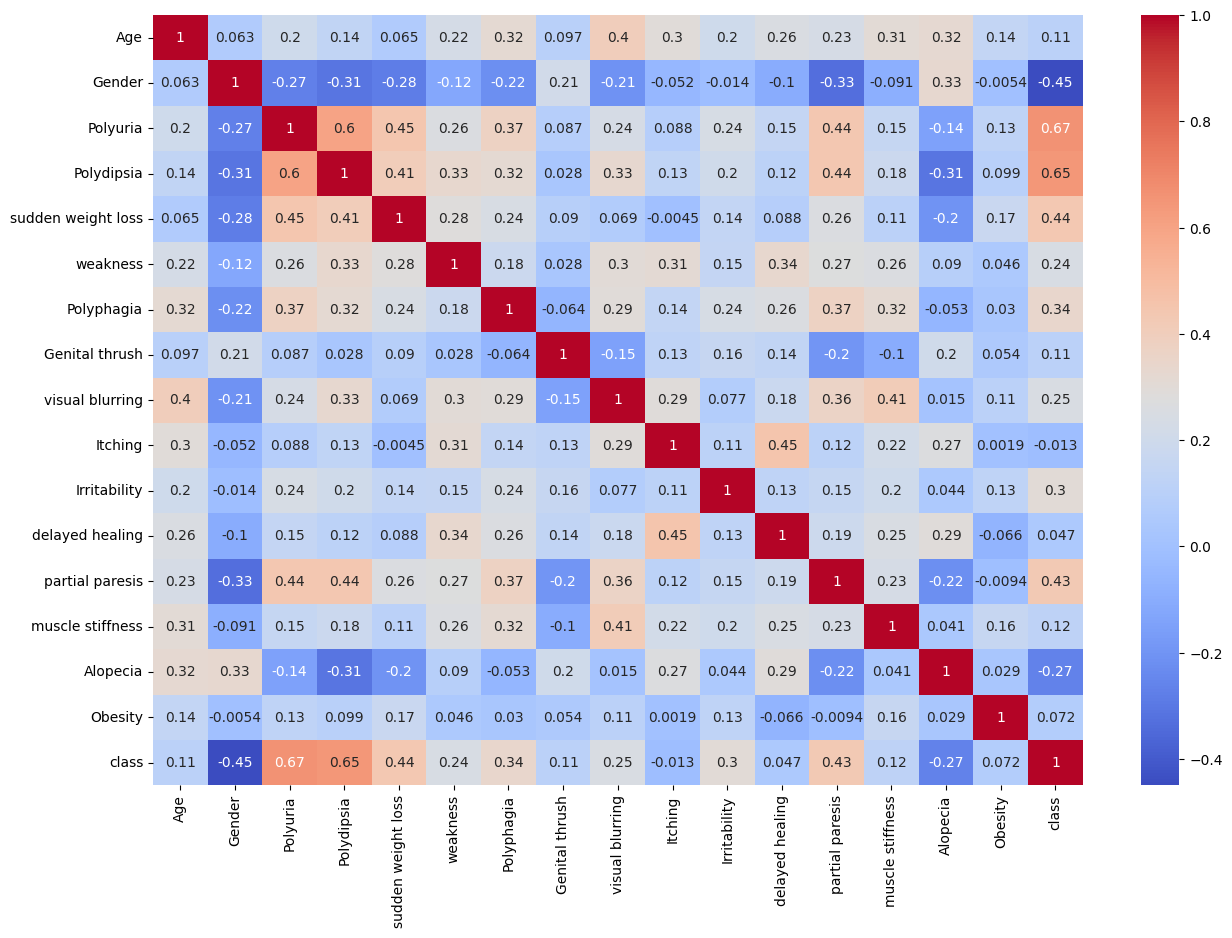

In [8]:
'''
Heatmap visualization of the variables correlation.
'''

plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [9]:
'''
Table of correlations from the strongest correlation with the
dependent variable to the less one.
'''

corr['class'].sort_values(ascending=False)

class                 1.000000
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
partial paresis       0.432288
Polyphagia            0.342504
Irritability          0.299467
visual blurring       0.251300
weakness              0.243275
muscle stiffness      0.122474
Genital thrush        0.110288
Age                   0.108679
Obesity               0.072173
delayed healing       0.046980
Itching              -0.013384
Alopecia             -0.267512
Gender               -0.449233
Name: class, dtype: float64

/var/folders/fq/5zs7fhh97j9fjl57d38bly_c0000gn/T/ipykernel_3770/3654343948.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='class', data=df_dummie, palette='coolwarm')


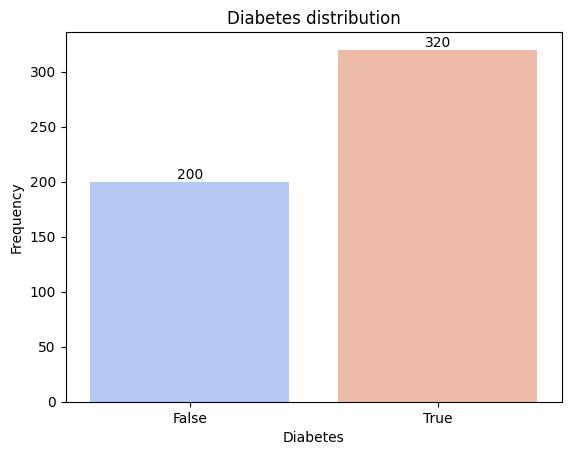

In [10]:
'''
Visual representation of the distribution of the dependent variable.
'''

ax = sns.countplot(x='class', data=df_dummie, palette='coolwarm')
plt.title('Diabetes distribution')
plt.xlabel('Diabetes')
plt.ylabel('Frequency')
for container in ax.containers:
    ax.bar_label(container)

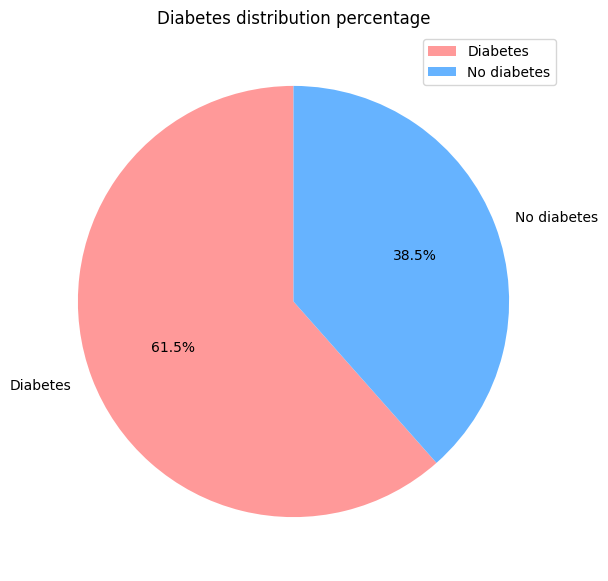

In [11]:
plt.figure(figsize=(15, 7))
plt.pie(df_dummie['class'].value_counts(), labels=['Diabetes', 'No diabetes'], autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'], startangle=90)
plt.title('Diabetes distribution percentage')
plt.legend()

Text(0, 0.5, 'Frequency')

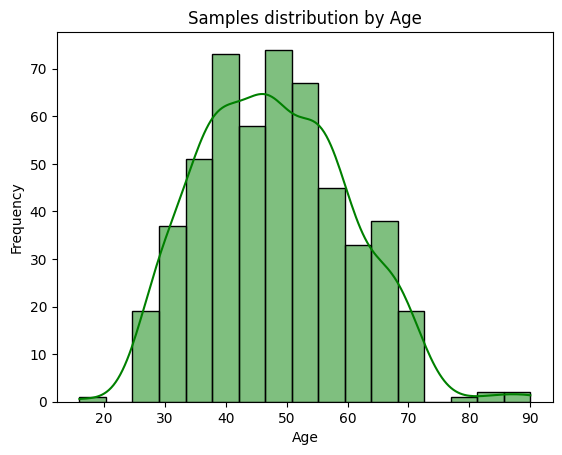

In [12]:
'''
Distribution of the data by Age.
'''

sns.histplot(df_dummie['Age'], kde=True, color='green')
plt.title('Samples distribution by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

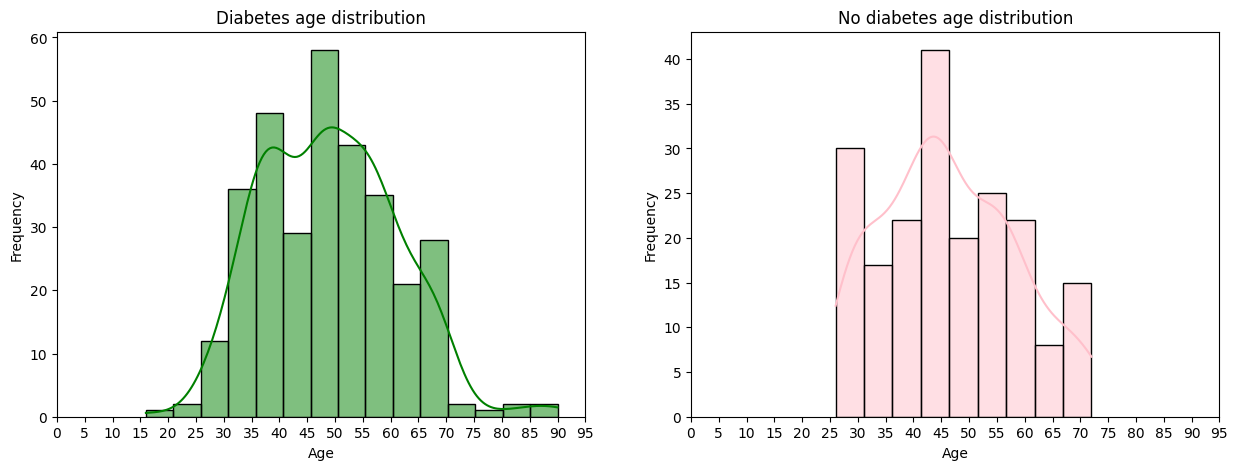

In [13]:
'''
Dependent variable values distribution by age.
'''

diabetes = df_dummie[df_dummie['class'] == True]
no_diabetes = df_dummie[df_dummie['class'] == False]

figure, (ax1, ax2) = plt.subplots(1, 2)
figure.set_size_inches((15, 5))
sns.histplot(data=diabetes, x='Age', ax=ax1, kde=True, color='green')
ax1.set_title('Diabetes age distribution')
ax1.set_xlabel('Age')
ax1.set_ylabel('Frequency')
ax1.set_xticks(range(0, 100, 5))

sns.histplot(data=no_diabetes, x='Age', ax=ax2, kde=True, color='pink')
ax2.set_title('No diabetes age distribution')
ax2.set_xlabel('Age')
ax2.set_ylabel('Frequency')
ax2.set_xticks(range(0, 100, 5))


([<matplotlib.axis.YTick at 0x1255d9650>,
 [Text(0, 0, '0'), Text(0, 1, '1')])

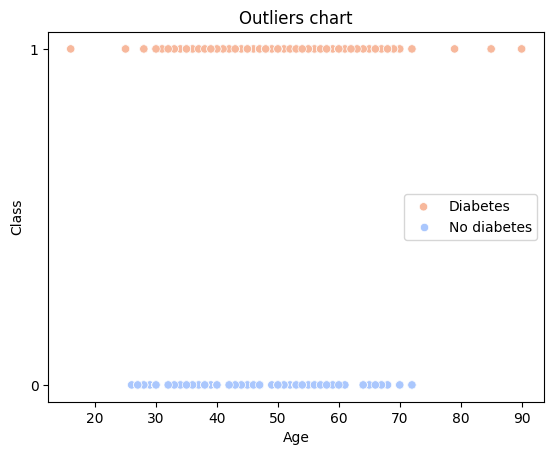

In [14]:
'''
Chart of the data distribution to visualize the existence 
of outlier samples.
'''

sns.scatterplot(data=df_dummie, x='Age', y='class', hue='class', palette='coolwarm')
plt.title('Outliers chart')
plt.xlabel('Age')
plt.ylabel('Class')
plt.legend(['Diabetes', 'No diabetes'])
plt.yticks(range(0, 2))

<h3>EDA insights</h3>
<ol>
<li>The top correlations with the diabetes variable are with: Polyuria, Polydipsia, sudden weight loss, partial paresis, and Polyphagia. These variables can be considered for use in future learning models.</li>
<li>The distribution histograms show that diabetes is more frequent among people aged 35 to 50, indicating the importance of considering medical diabetes studies in that age range.</li>
<li>The distribution histogram shows that after the age of 50, it becomes less common to develop diabetes over the years.</li>
<li>The data does not have a good balance of samples with diabetes and no-diabetes, 61.5% versus 38.5%. This imbalance means that future learning models could have difficulties predicting no-diabetes cases and may be better at predicting diabetes cases only.</li>
<li>It appears necessary to implement a process to treat outliers for the True values in the dependent variable 'class'.</li>
</ol>

<h1>3. Data Preparation</h1>
<p>In this phase, the dataset undergoes a series of significant transformations to ensure it is correctly processed and accepted by the future machine learning models in order to help them to perfom better results.</p>

<h3>Encoding categorical data</h3>

In [15]:
'''
Splitting features from the dependent variable.
'''

X = df_dummie.drop(['class'], axis=1)
y = df_dummie['class']


In [16]:
'''
Encoding the feature data from Boolean values to Binary values.
'''

df_encoded = X.astype(int)
df_encoded.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


<h3>Standardizing the data</li>
      

In [84]:
'''
Standardizing feature data to enhance model 
and process performance.
'''

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)
df_scaled = pd.DataFrame(df_scaled, columns=df_encoded.columns)
df_scaled.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,-0.661367,0.765092,-0.992337,1.109847,-0.846269,0.839594,-0.915126,-0.535844,-0.901025,1.027295,-0.565506,1.084312,-0.869918,1.290994,1.380227,2.215647
1,0.821362,0.765092,-0.992337,-0.901025,-0.846269,0.839594,-0.915126,-0.535844,1.109847,-0.973430,-0.565506,-0.922244,1.149534,-0.774597,1.380227,-0.451335
2,-0.578993,0.765092,1.007722,-0.901025,-0.846269,0.839594,1.092746,-0.535844,-0.901025,1.027295,-0.565506,1.084312,-0.869918,1.290994,1.380227,-0.451335
3,-0.249498,0.765092,-0.992337,-0.901025,1.181657,0.839594,1.092746,1.866215,-0.901025,1.027295,-0.565506,1.084312,-0.869918,-0.774597,-0.724518,-0.451335
4,0.986110,0.765092,1.007722,1.109847,1.181657,0.839594,1.092746,-0.535844,1.109847,1.027295,1.768328,1.084312,1.149534,1.290994,1.380227,2.215647


<h3>Studying outliers</h3>
           

In [18]:
'''
Removing outliers from the dataset and the dependent variable 
using the Isolation Forest technique.
'''

isolation_forest = IsolationForest(contamination=0.05, random_state=42)
outliers_map = isolation_forest.fit_predict(df_scaled)
X_filtered = df_scaled[outliers_map == 1]
y_filtered = y[outliers_map == 1]

In [19]:
'''
Changing Boolean values for Binary values on the dependent variable.
'''

y_filtered = np.where(y_filtered == True, 1, 0)

([<matplotlib.axis.YTick at 0x125836cd0>,
 [Text(0, 0, '0'), Text(0, 1, '1')])

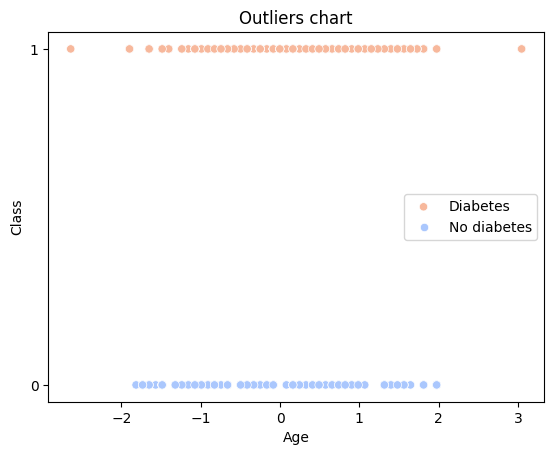

In [20]:
'''
Visualization of the data distribution after outlier removal.
'''

temp = pd.DataFrame(X_filtered)
temp['class'] = y_filtered

sns.scatterplot(data=temp, x='Age', y='class', hue='class', palette='coolwarm')
plt.title('Outliers chart')
plt.xlabel('Age')
plt.ylabel('Class')
plt.legend(['Diabetes', 'No diabetes'])
plt.yticks(range(0, 2))

<h3>Identifying principal features</h3>
           

<h4>Random Fores Technique</h4>

In [21]:
'''
Training a Random Forest model to extract feature importances.
'''

rf_feature_selector = RandomForestClassifier(random_state=42)
rf_feature_selector.fit(X_filtered, y_filtered)

RandomForestClassifier(random_state=42)

In [22]:
'''
Getting the list with the importance of each feature for predicting diabetes
calculated by the model.
'''

rf_importances_list = rf_feature_selector.feature_importances_
rf_importances_list

array([0.08097216, 0.09957178, 0.25474581, 0.18730497, 0.05141791,
       0.02538759, 0.02944828, 0.01396378, 0.02764002, 0.02792068,
       0.02940322, 0.02712626, 0.05372112, 0.02919636, 0.04203205,
       0.020148  ])

In [23]:
'''
Creation of a imporances tables ordered by the 
most to the less important.
'''

rf_feature_importances = pd.DataFrame({'Feature': X_filtered.columns, 'Importance': rf_importances_list})
rf_feature_importances.sort_values(by='Importance', ascending=False)

,Feature,Importance
2,Polyuria,0.254746
3,Polydipsia,0.187305
1,Gender,0.099572
0,Age,0.080972
12,partial paresis,0.053721
4,sudden weight loss,0.051418
14,Alopecia,0.042032
6,Polyphagia,0.029448
10,Irritability,0.029403
13,muscle stiffness,0.029196


/var/folders/fq/5zs7fhh97j9fjl57d38bly_c0000gn/T/ipykernel_3770/1614150419.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=rf_feature_importances.sort_values(by='Importance', ascending=False), x='Importance', y='Feature', palette='dark6')


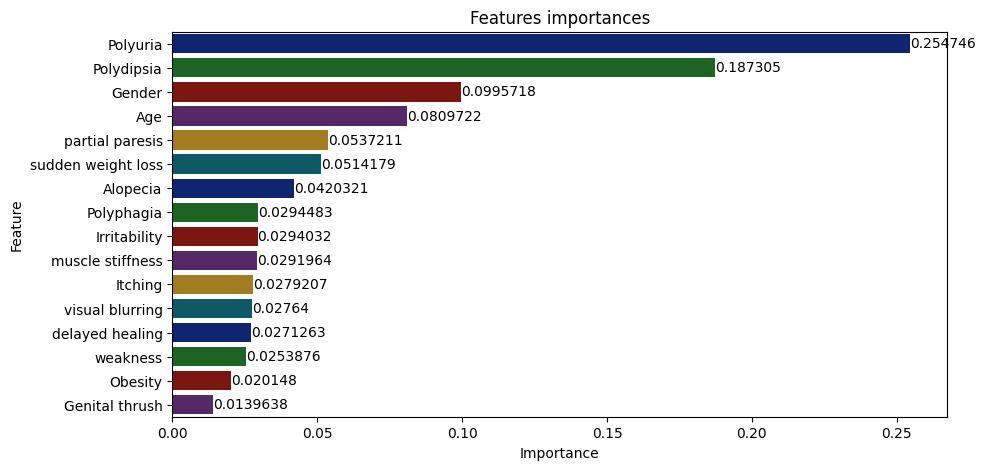

In [24]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=rf_feature_importances.sort_values(by='Importance', ascending=False), x='Importance', y='Feature', palette='dark6')
plt.title('Features importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
for container in ax.containers:
    ax.bar_label(container)

In [25]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(C=0.5, kernel='linear'),
    'k-NN': KNeighborsClassifier(n_neighbors=3)
}

<h4>Cross Value Score Technique</h4>

In [26]:
'''
This code block evaluates the performance of various supervised learning models 
using cross-validation. It demonstrates how training models with different features 
of the dataset affect the scores, aiding in the selection of the optimal feature set.
'''

models_scores = {}
for name, model in models.items():
    scores = {name: []}
    for i in range(1, len(rf_feature_importances['Feature']) + 1):
        columns = rf_feature_importances['Feature'][:i].values
        score = cross_val_score(model, X_filtered[columns], y_filtered, cv=5, scoring='accuracy')
        scores[name].append({'Score': round(float(score.mean()), 2), 'Features': columns.tolist()})
    models_scores[name] = scores[name]

In [27]:
'''
Performance of features combinations by model.
'''

models_scores

{'Logistic Regression': [{'Score': 0.59, 'Features': ['Age']},
  {'Score': 0.69, 'Features': ['Age', 'Gender']},
  {'Score': 0.88, 'Features': ['Age', 'Gender', 'Polyuria']},
  {'Score': 0.89, 'Features': ['Age', 'Gender', 'Polyuria', 'Polydipsia']},
  {'Score': 0.89,
   'Features': ['Age',
    'Gender',
    'Polyuria',
    'Polydipsia',
    'sudden weight loss']},
  {'Score': 0.9,
   'Features': ['Age',
    'Gender',
    'Polyuria',
    'Polydipsia',
    'sudden weight loss',
    'weakness']},
  {'Score': 0.9,
   'Features': ['Age',
    'Gender',
    'Polyuria',
    'Polydipsia',
    'sudden weight loss',
    'weakness',
    'Polyphagia']},
  {'Score': 0.9,
   'Features': ['Age',
    'Gender',
    'Polyuria',
    'Polydipsia',
    'sudden weight loss',
    'weakness',
    'Polyphagia',
    'Genital thrush']},
  {'Score': 0.9,
   'Features': ['Age',
    'Gender',
    'Polyuria',
    'Polydipsia',
    'sudden weight loss',
    'weakness',
    'Polyphagia',
    'Genital thrush',
    'vis

In [28]:
'''
Display the feature selection that offers 
the best score for each model.
'''

models_principal_features = {
    model_name: max(results_list, key=lambda x: x['Score'])
    for model_name, results_list in models_scores.items()
}

models_principal_features
    

{'Logistic Regression': {'Score': 0.93,
  'Features': ['Age',
   'Gender',
   'Polyuria',
   'Polydipsia',
   'sudden weight loss',
   'weakness',
   'Polyphagia',
   'Genital thrush',
   'visual blurring',
   'Itching',
   'Irritability',
   'delayed healing',
   'partial paresis']},
 'Decision Tree': {'Score': 0.96,
  'Features': ['Age',
   'Gender',
   'Polyuria',
   'Polydipsia',
   'sudden weight loss',
   'weakness']},
 'Random Forest': {'Score': 0.98,
  'Features': ['Age',
   'Gender',
   'Polyuria',
   'Polydipsia',
   'sudden weight loss',
   'weakness',
   'Polyphagia',
   'Genital thrush',
   'visual blurring',
   'Itching',
   'Irritability',
   'delayed healing',
   'partial paresis',
   'muscle stiffness',
   'Alopecia']},
 'SVM': {'Score': 0.94,
  'Features': ['Age',
   'Gender',
   'Polyuria',
   'Polydipsia',
   'sudden weight loss',
   'weakness',
   'Polyphagia',
   'Genital thrush',
   'visual blurring',
   'Itching',
   'Irritability',
   'delayed healing',
   'par

<h4>Logistic Regression Technique</h4>

In [29]:
(X_train_temp, 
X_test_temp, 
y_train_temp, 
y_test_temp) = train_test_split(X_filtered, y_filtered, train_size=.80)

regression_selector_model = LogisticRegression(random_state=42)
sequential_features_selector = SequentialFeatureSelector(regression_selector_model, n_features_to_select=5, direction='forward', cv=5)
sequential_features_selector.fit(X_filtered, y_filtered)
sequential_features_list = X_filtered.columns[sequential_features_selector.get_support()]

In [30]:
'''
List of features suggested by the Sequential Feature Selector class
based on the Logistic Regression model.
'''

sequential_features_list

Index(['Gender', 'Polyuria', 'Polydipsia', 'partial paresis', 'Alopecia'], dtype='object')

<p>Based on the comprehensive information provided by the Cross Validation Model Technique, it has been selected as the method for feature selection for each model. 
The feature selection information provided by the Random Forest Model and Logistic Regression Model seems ideal for smaller datasets with fewer features but lacks accuracy with larger datasets.</p>

<h3>Reducing dimensionality</h3>
         

In [31]:
def dimensionality_reduce(X_data, models_features, model_name, n_components=2):
    '''
    DESCRIPTION:
    This function performs dimensionality reduction on the given 
    dataset using Principal Component Analysis (PCA). 
    It selects the features specified for the given model and 
    reduces them to the specified number of components.
        
    PARAMS:
    X_data: pandas.DataFrame
        The input data containing all features.
    models_features : dict
        A dictionary where keys are model names and values are dictionaries containing feature information.
    model_name : str
        The name of the model for which features are to be selected -> 
        Logistic Regression | Decision Tree | Random Forest | SVM | k-NN
    n_components : int, optional (default=2)
        The number of principal components to keep.
    
    RETURN:
    numpy.ndarray
    The transformed data with reduced dimensions.
    '''
    
    columns = models_features[model_name]['Features']
    X_data_selected = X_data[columns]
    pca = PCA(n_components=n_components, random_state=42)
    X_output_data = pca.fit_transform(X_data_selected)
    return X_output_data

<h3>Splitting the data</h3>

In [32]:
def data_split(X_data, y_data, train_size=0.8):
    '''
    DESCRIPTION:
    Splits the data into training and testing sets.
    
    PARAMETERS:
    X_data: np.array
        Numpy array of data with PCA applied.
    y_data: np.array
        Numpy array of the dependent variable.
    train_size: float, optional
        Proportion of the data to include in the training set. Default is 0.8.
    
    RETURNS:
    tuple
        Four variables: X_train, X_test, y_train, y_test
    '''
    y_data = np.where(y_data == True, 1, 0)
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=train_size, random_state=42)
    return (X_train, X_test, y_train, y_test)

In [33]:
def get_model_data(X_data, y_data, models_features, model_name, n_components=2, train_size=0.8):
    '''
    DESCRIPTION:
    This function applies dimensionality reduction to the dataset
    and splits it into training and testing sets using the specified model's features.
    
    PARAMETERS:
    X_data: pandas.DataFrame
        The input data containing all features.
    y_data: pandas.Series
        The dependent variable.
    models_features: dict
        A dictionary where keys are model names and values are dictionaries containing feature information.
    model_name: str
        The name of the model for which features are to be selected -> 
        Logistic Regression | Decision Tree | Random Forest | SVM | k-NN
    n_components: int, optional (default=2)
        The number of principal components to keep.
    train_size: float, optional (default=0.8)
        Proportion of the data to include in the training set.
        
    RETURNS:
    tuple
        Four variables: X_train, X_test, y_train, y_test
    '''
    data_reduced = dimensionality_reduce(X_data, models_features, model_name, n_components)
    data_splitted = data_split(data_reduced, y_data, train_size)
    return data_splitted

In [34]:
X_train, X_test, y_train, y_test = get_model_data(X_filtered, y_filtered, models_principal_features, 'Logistic Regression')

<h1>4. Model development</h1>
<p>This phase is dedicated to the instantiation and training of various machine learning models to identify the one that best solves the problem.</p>


<h3>Logistic Regression Model</h3>


In [35]:
'''
Getting data with selected features for 
training Logistic Regression Models.
'''

X_train_lr, X_test_lr, y_train_lr, y_test_lr = get_model_data(X_filtered, y_filtered, models_principal_features, 'Logistic Regression')

In [36]:
'''
Training Logistic Regression model.
'''

logistic_regression_model = LogisticRegression(random_state=42)
logistic_regression_model.fit(X_train_lr, y_train_lr)


LogisticRegression(random_state=42)

<h3>Decision Tree Model</h3>


In [37]:
'''
Getting data with selected features for 
training Decision Tree Models.
'''

X_train_dt, X_test_dt, y_train_dt, y_test_dt = get_model_data(X_filtered, y_filtered, models_principal_features, 'Decision Tree')

In [38]:
'''
Training Decision Tree model.
'''

decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_dt, y_train_dt)

DecisionTreeClassifier(random_state=42)

<h3>Random Forest Model</h3>


In [39]:
'''
Getting data with selected features for 
training Random Forest Models.
'''

X_train_rf, X_test_rf, y_train_rf, y_test_rf = get_model_data(X_filtered, y_filtered, models_principal_features, 'Decision Tree')

In [40]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_rf, y_train_rf)

RandomForestClassifier(random_state=42)

<h3>SVM Model</h3>


In [41]:
'''
Getting data with selected features for 
training SVM Models.
'''

X_train_svm, X_test_svm, y_train_svm, y_test_svm = get_model_data(X_filtered, y_filtered, models_principal_features, 'Decision Tree')

In [42]:
svm_model = SVC(C=0.5, kernel='linear')
svm_model.fit(X_train_svm, y_train_svm)

SVC(C=0.5, kernel='linear')

<h3>K-NN Model</h3>

In [43]:
'''
Getting data with selected features for 
training k-Nearest Neighbors models.
'''

X_train_knn, X_test_knn, y_train_knn, y_test_knn = get_model_data(X_filtered, y_filtered, models_principal_features, 'Decision Tree')

In [44]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_knn, y_train_knn)

KNeighborsClassifier(n_neighbors=3)

<h1>5. Evaluation</h1>
<p>This phase focuses on generating charts and comparing models to determine which one perfom better results and best solves the problem.</p>

<h3>Calculating metrics</h3>


<h4>Logistic Regression Model</h4>


In [45]:
'''
Getting predictions for Logistic Regression models using the 
testing data.
'''

lr_prediction = logistic_regression_model.predict(X_test_lr)

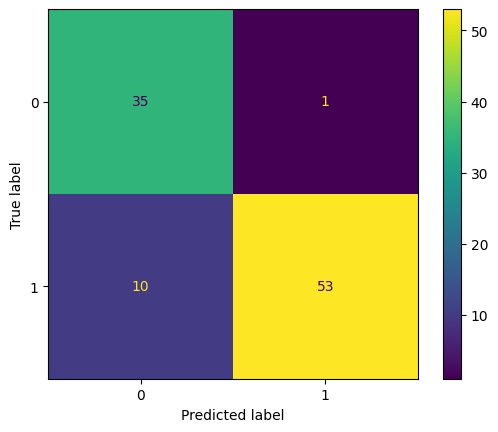

In [46]:
'''
Shows the Confusion Matrix of the Logistic Regression model
performance.
'''

ConfusionMatrixDisplay.from_estimator(logistic_regression_model, X_test_lr, y_test_lr)

In [47]:
'''
Prints the results of the metris 'Accuracy score' and 
'Classification report'.
'''

lr_accuracy_score = accuracy_score(y_test_lr, lr_prediction)
lr_classification_report = classification_report(y_test_lr, lr_prediction)
print(f'''
    ____________________________________________________________________________
    | LOGISTIC REGRESSION MODEL RESULTS                                        |
    <-------------------------------------------------------------------------->
    Estimated accuracy score: {models_principal_features['Logistic Regression']['Score']}\n
    <-------------------------------------------------------------------------->
    Real accuracy score: {lr_accuracy_score:.2f}\n
    <-------------------------------------------------------------------------->
    Classification report:\n
    {lr_classification_report}
    ''')


    ____________________________________________________________________________
    | LOGISTIC REGRESSION MODEL RESULTS                                        |
    <-------------------------------------------------------------------------->
    Estimated accuracy score: 0.93

    <-------------------------------------------------------------------------->
    Real accuracy score: 0.89

    <-------------------------------------------------------------------------->
    Classification report:

                  precision    recall  f1-score   support

           0       0.78      0.97      0.86        36
           1       0.98      0.84      0.91        63

    accuracy                           0.89        99
   macro avg       0.88      0.91      0.89        99
weighted avg       0.91      0.89      0.89        99

    


<h4>Decision Tree Model</h4>


In [48]:
'''
Getting predictions for Decision Tree models using the 
testing data.
'''

dt_prediction = decision_tree_model.predict(X_test_dt)

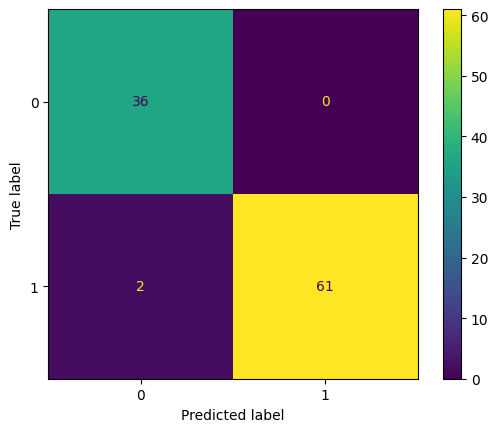

In [49]:
'''
Shows the Confusion Matrix of the Decision Tree model
performance.
'''

ConfusionMatrixDisplay.from_estimator(decision_tree_model, X_test_dt, y_test_dt)

In [50]:
'''
Prints the results of the metris 'Accuracy score' and 
'Classification report'.
'''

dt_accuracy_score = accuracy_score(y_test_dt, dt_prediction)
dt_classification_report = classification_report(y_test_dt, dt_prediction)
print(f'''
    ____________________________________________________________________________
    | DECISION TREE MODEL RESULTS                                              |
    <-------------------------------------------------------------------------->
    Estimated accuracy score: {models_principal_features['Decision Tree']['Score']}\n
    <-------------------------------------------------------------------------->
    Real ccuracy score: {dt_accuracy_score:.2f}\n
    <-------------------------------------------------------------------------->
    Classification report:\n 
    {dt_classification_report}
    ''')


    ____________________________________________________________________________
    | DECISION TREE MODEL RESULTS                                              |
    <-------------------------------------------------------------------------->
    Estimated accuracy score: 0.96

    <-------------------------------------------------------------------------->
    Real ccuracy score: 0.98

    <-------------------------------------------------------------------------->
    Classification report:
 
                  precision    recall  f1-score   support

           0       0.95      1.00      0.97        36
           1       1.00      0.97      0.98        63

    accuracy                           0.98        99
   macro avg       0.97      0.98      0.98        99
weighted avg       0.98      0.98      0.98        99

    


<h4>Random Forest Model</h4>


In [51]:
'''
Getting predictions for Random Forest models using the 
testing data.
'''

rf_prediction = random_forest_model.predict(X_test_rf)

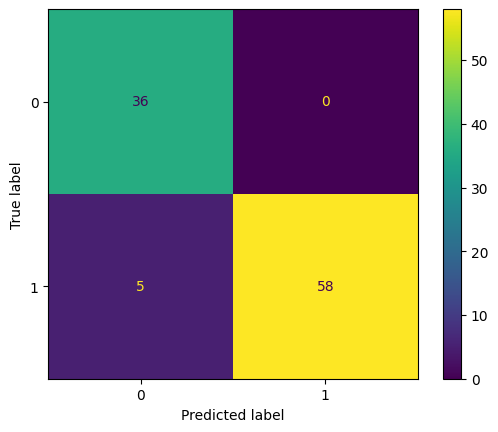

In [52]:
'''
Shows the Confusion Matrix of the Random Forest model
performance.
'''

ConfusionMatrixDisplay.from_estimator(random_forest_model, X_test_rf, y_test_rf)

In [53]:
'''
Prints the results of the metris 'Accuracy score' and 
'Classification report'.
'''

rf_accuracy_score = accuracy_score(y_test_rf, rf_prediction)
rf_classification_report = classification_report(y_test_rf, rf_prediction)
print(f'''
    ____________________________________________________________________________
    | RANDOM FOREST MODEL RESULTS                                              |
    <-------------------------------------------------------------------------->
    Estimated accuracy score: {models_principal_features['Random Forest']['Score']}\n
    <-------------------------------------------------------------------------->
    Real accuracy score: {rf_accuracy_score:.2f}\n
    <-------------------------------------------------------------------------->
    Classification report:\n
    {rf_classification_report}
    ''')


    ____________________________________________________________________________
    | RANDOM FOREST MODEL RESULTS                                              |
    <-------------------------------------------------------------------------->
    Estimated accuracy score: 0.98

    <-------------------------------------------------------------------------->
    Real accuracy score: 0.95

    <-------------------------------------------------------------------------->
    Classification report:

                  precision    recall  f1-score   support

           0       0.88      1.00      0.94        36
           1       1.00      0.92      0.96        63

    accuracy                           0.95        99
   macro avg       0.94      0.96      0.95        99
weighted avg       0.96      0.95      0.95        99

    


<h4>SVM Model</h4>


In [54]:
'''
Getting predictions for SVM models using the 
testing data.
'''

svm_prediction = random_forest_model.predict(X_test_svm)

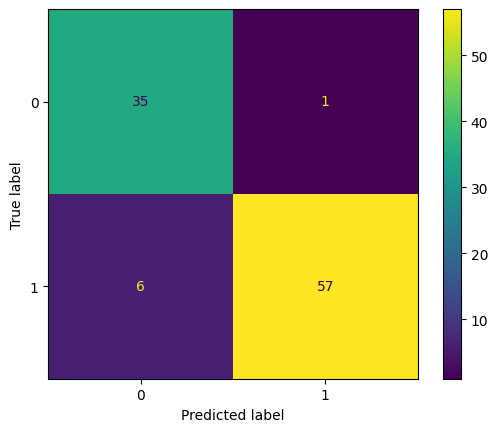

In [55]:
'''
Shows the Confusion Matrix of the SVM model
performance.
'''

ConfusionMatrixDisplay.from_estimator(svm_model, X_test_svm, y_test_svm)

In [56]:
'''
Prints the results of the metris 'Accuracy score' and 
'Classification report'.
'''

svm_accuracy_score = accuracy_score(y_test_svm, svm_prediction)
svm_classification_report = classification_report(y_test_svm, svm_prediction)
print(f'''
    ____________________________________________________________________________
    | SVM MODEL RESULTS                                                        |
    <-------------------------------------------------------------------------->
    Estimated accuracy score: {models_principal_features['Random Forest']['Score']}\n
    <-------------------------------------------------------------------------->
    Real accuracy score: {svm_accuracy_score:.2f}\n
    <-------------------------------------------------------------------------->
    Classification report:\n
    {svm_classification_report}
    ''')


    ____________________________________________________________________________
    | SVM MODEL RESULTS                                                        |
    <-------------------------------------------------------------------------->
    Estimated accuracy score: 0.98

    <-------------------------------------------------------------------------->
    Real accuracy score: 0.95

    <-------------------------------------------------------------------------->
    Classification report:

                  precision    recall  f1-score   support

           0       0.88      1.00      0.94        36
           1       1.00      0.92      0.96        63

    accuracy                           0.95        99
   macro avg       0.94      0.96      0.95        99
weighted avg       0.96      0.95      0.95        99

    


<h4>K-NN Model</h4>

In [57]:
'''
Getting predictions for k-NN models using the 
testing data.
'''

knn_prediction = knn_model.predict(X_test_knn)

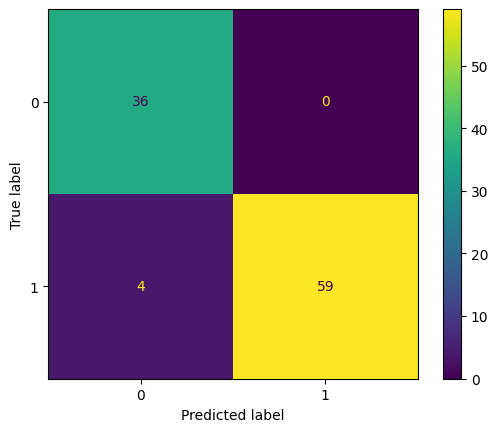

In [58]:
'''
Shows the Confusion Matrix of the k-NN model
performance.
'''

ConfusionMatrixDisplay.from_estimator(knn_model, X_test_knn, y_test_knn)

In [59]:
'''
Prints the results of the metris 'Accuracy score' and 
'Classification report'.
'''

knn_accuracy_score = accuracy_score(y_test_knn, knn_prediction)
knn_classification_report = classification_report(y_test_knn, knn_prediction)
print(f'''
    ____________________________________________________________________________
    | k-NN MODEL RESULTS                                                       |
    <-------------------------------------------------------------------------->
    Estimated accuracy score: {models_principal_features['k-NN']['Score']}\n
    <-------------------------------------------------------------------------->
    Real accuracy score: {knn_accuracy_score:.2f}\n
    <-------------------------------------------------------------------------->
    Classification report:\n
    {knn_classification_report}
    ''')


    ____________________________________________________________________________
    | k-NN MODEL RESULTS                                                       |
    <-------------------------------------------------------------------------->
    Estimated accuracy score: 0.95

    <-------------------------------------------------------------------------->
    Real accuracy score: 0.96

    <-------------------------------------------------------------------------->
    Classification report:

                  precision    recall  f1-score   support

           0       0.90      1.00      0.95        36
           1       1.00      0.94      0.97        63

    accuracy                           0.96        99
   macro avg       0.95      0.97      0.96        99
weighted avg       0.96      0.96      0.96        99

    


<h3>Generating charts</h3>


<h4>Logistic Regression Model</h4>


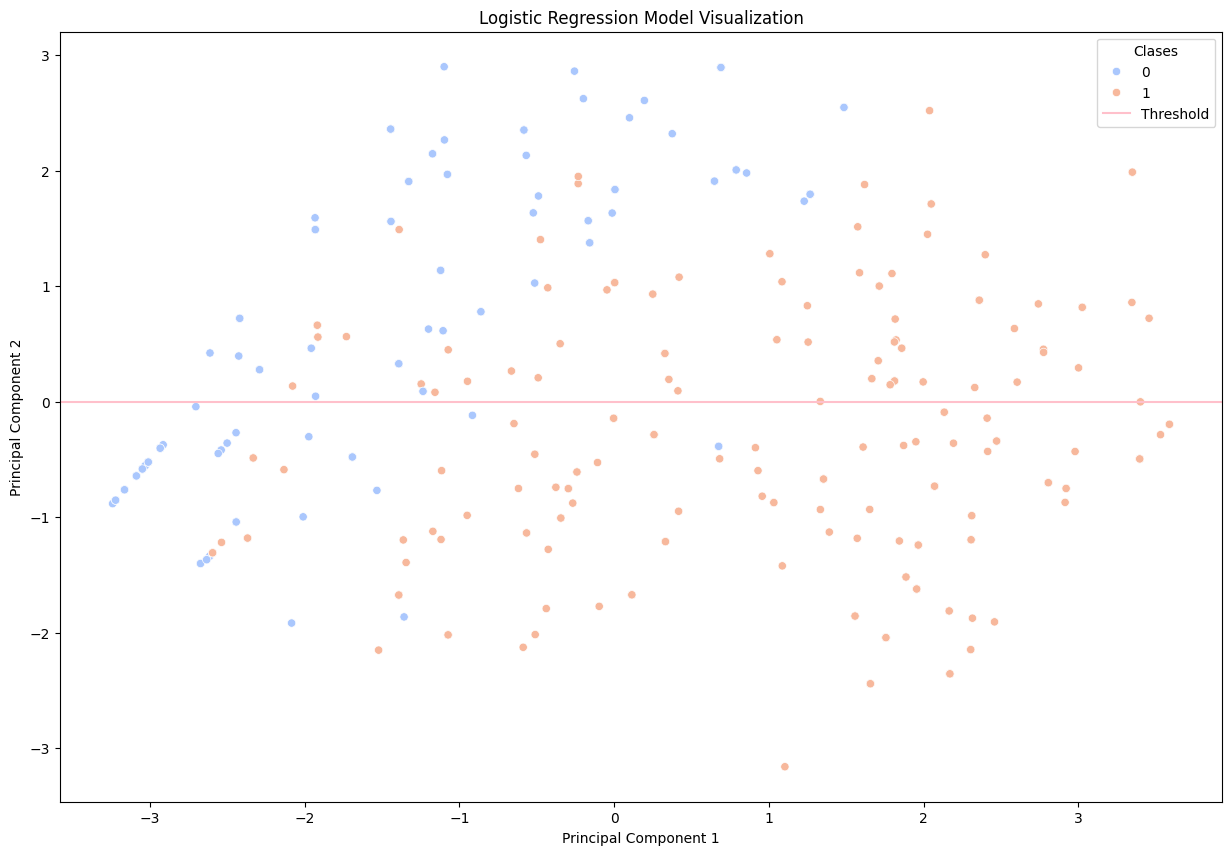

In [60]:
plt.figure(figsize=(15, 10))
scatter = sns.scatterplot(x=X_train_lr[:, 0], y=X_train_lr[:, 1], hue=y_train_lr, palette='coolwarm')
plt.axhline(y=0, color='pink', label='Threshold')
handles, labels = scatter.get_legend_handles_labels()
custom_labels = {'False': 'No diabetes', 'True': 'Diabetes'}
new_labels = [custom_labels.get(label, label) for label in labels]
plt.title('Logistic Regression Model Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles, new_labels, title='Clases')

<h4>Decision Tree Model</h4>


In [61]:
decision_tree_model.feature_importances_

array([0.80466277, 0.19533723])

Text(0.5, 1.0, 'Decision Tree Model Visualization')

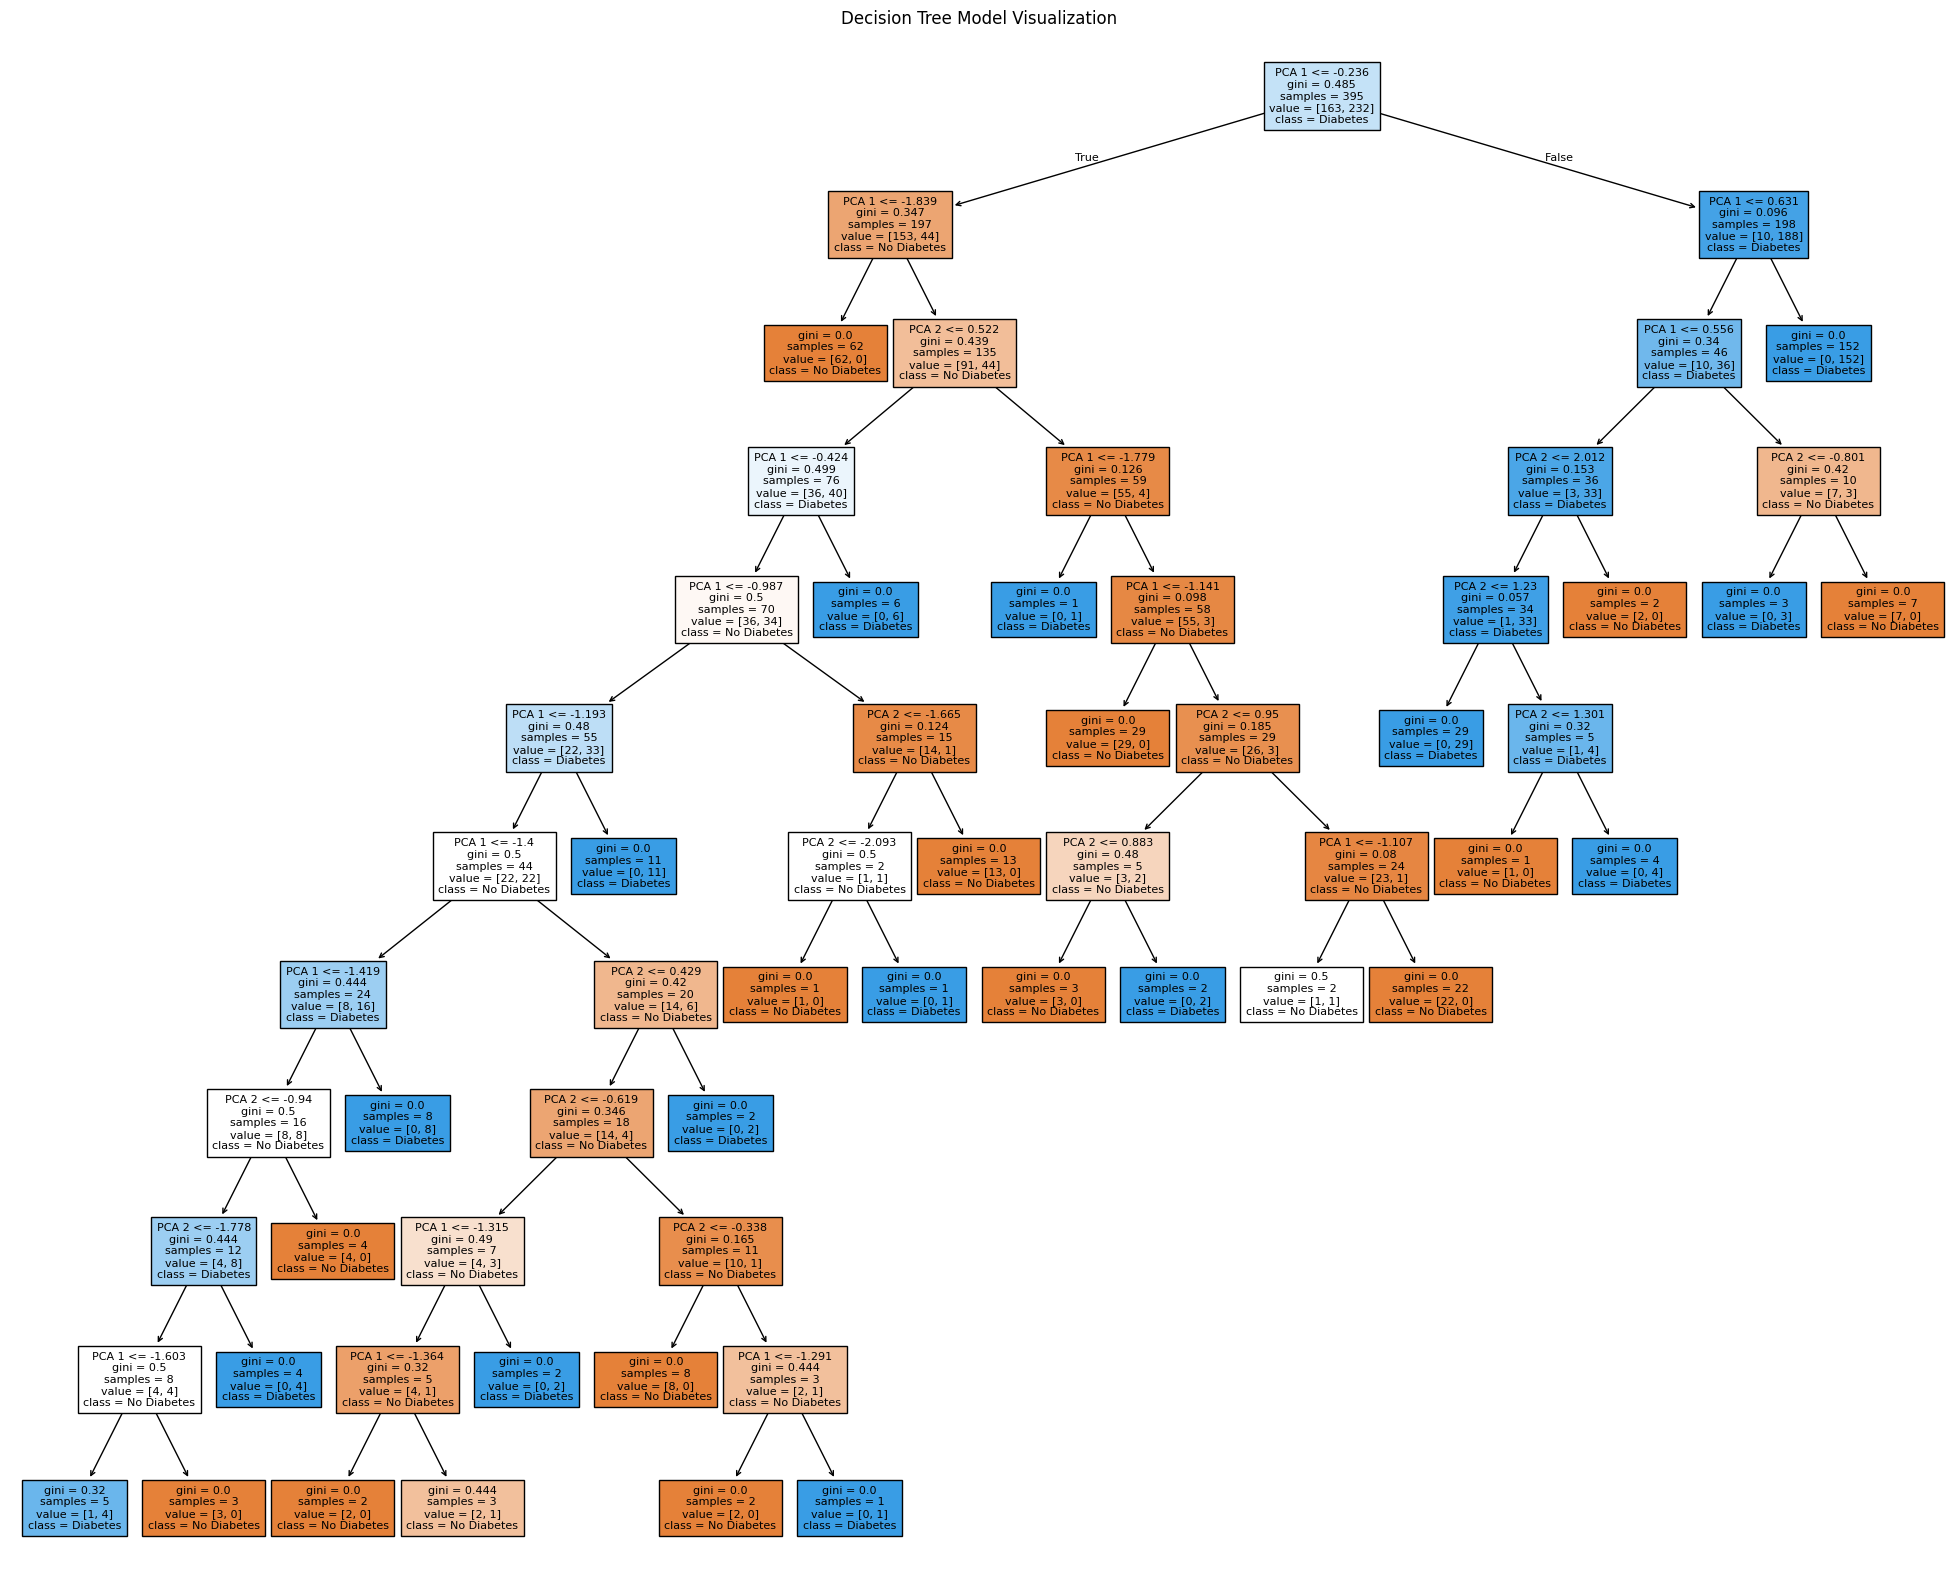

In [62]:
plt.figure(figsize=(25, 20))
plot_tree(decision_tree_model, class_names=['No Diabetes', 'Diabetes'], fontsize=8, filled=True, feature_names=['PCA 1', 'PCA 2'])
plt.title('Decision Tree Model Visualization')

<h4>Random Forest Model</h4>


Text(0.5, 1.0, 'Random Forest Model Visualization')

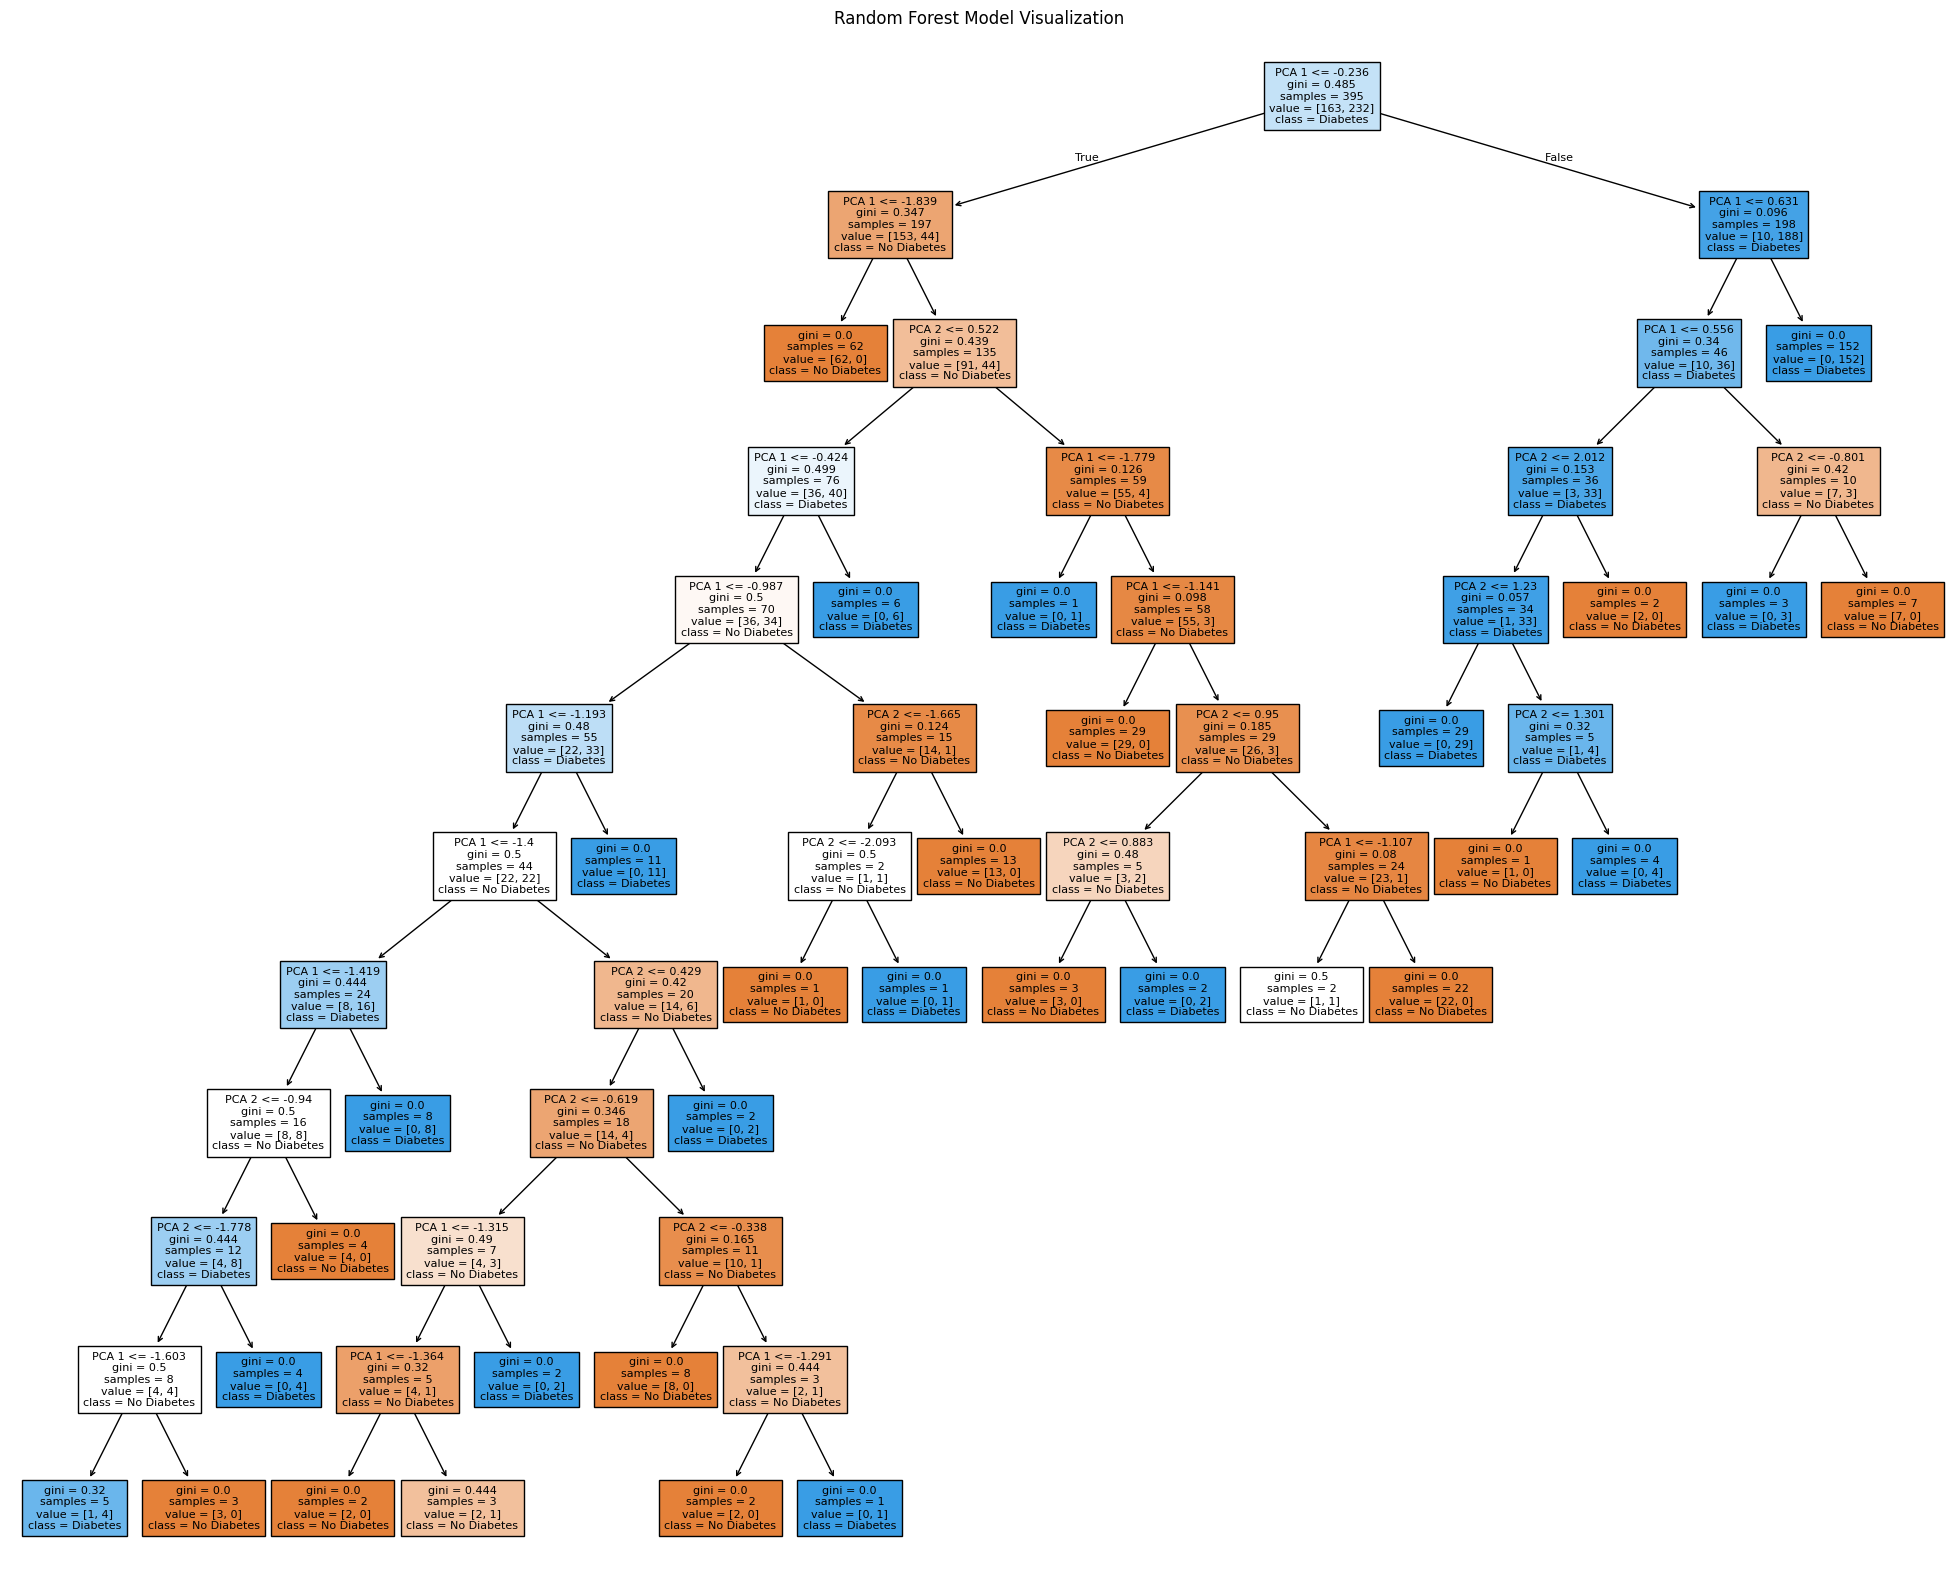

In [63]:
plt.figure(figsize=(25, 20))
plot_tree(decision_tree_model, filled=True, class_names=['No Diabetes', 'Diabetes'], feature_names=['PCA 1', 'PCA 2'], fontsize=8)
plt.title('Random Forest Model Visualization')

<h4>SVM Model</h4>


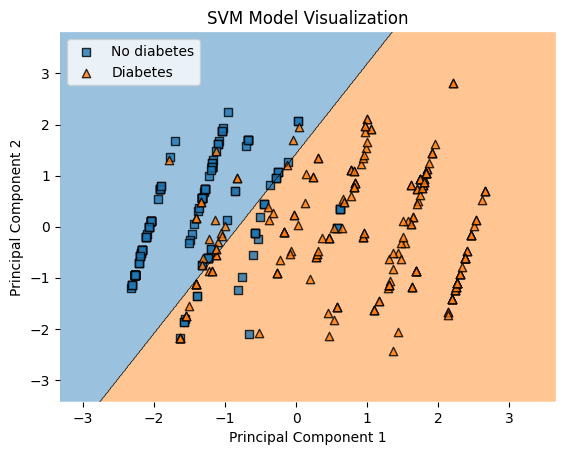

In [64]:
ax = plot_decision_regions(X_train_svm, np.array(y_train_svm), clf=svm_model, legend=2)
handles, labels = ax.get_legend_handles_labels()
custom_labels = {'0':'No diabetes', '1': 'Diabetes'}
new_labels = [custom_labels.get(label, label) for label in labels]
plt.title('SVM Model Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles, new_labels)

<h4>K-NN Model</h4>

Text(0, 0.5, 'Principal Component 2')

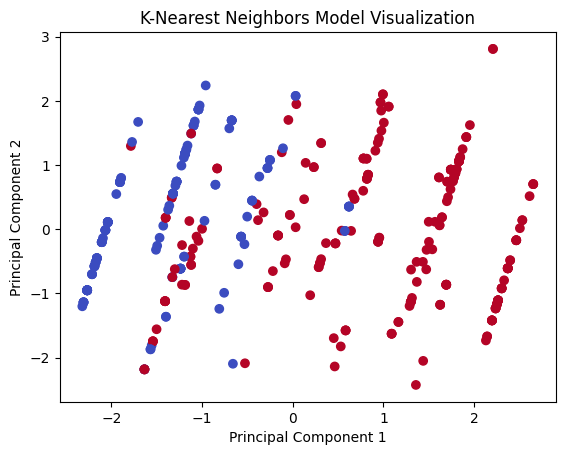

In [65]:
plt.scatter(X_train_knn[:, 0], X_train_knn[:, 1], c=y_train_knn, cmap='coolwarm')
plt.title('K-Nearest Neighbors Model Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

<h3>Deriving insights</h3>


<ol>
<li>The technique of training each model with different sets of features according to the best-performing variables seems effective in achieving better scores.</li>
<li>The scores estimated for each model using the Cross-Validation technique closely match the actual scores obtained after making predictions, indicating that the models are reliable.</li>
<li>While many models show high precision rates, not all are equally good at predicting both cases: False (No diabetes) and True (Diabetes).</li>
<li>The model with the best performance appears to be the Decision Tree.</li>
</ol>

<h3>Model selection</h3>

In [66]:
real_models_score = pd.DataFrame({
    'Model': models_principal_features.keys(),
    'Score': [round(score * 100) for score in [lr_accuracy_score, dt_accuracy_score, rf_accuracy_score, svm_accuracy_score, knn_accuracy_score]]
})


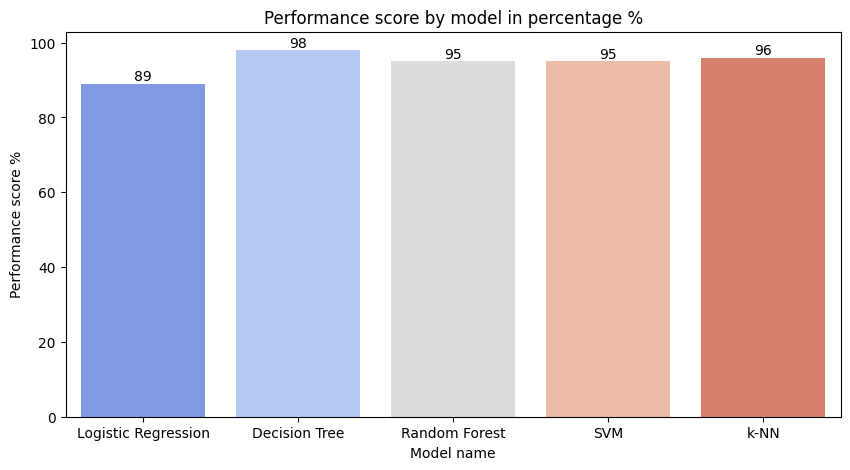

In [67]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=real_models_score, x=real_models_score['Model'], y=real_models_score['Score'], hue=real_models_score['Model'],palette='coolwarm')
plt.title('Performance score by model in percentage %')
plt.xlabel('Model name')
plt.ylabel('Performance score %')
for container in ax.containers:
    ax.bar_label(container)

<p>The best model to work with is the <b>'Decision Tree' model</b>. According to the classification report and the confusion matrix, this model has the highest accuracy rate for predicting both False cases (No diabetes) and True cases (Diabetes). Additionally, its overall score surpasses the other models and it requires fewer training variables, which translates to lower computational resources.</p>

In [68]:
'''
Saving the model for future uses.
'''

joblib.dump(decision_tree_model, filename='diabetes_decision_tree_model.pkl')

['diabetes_decision_tree_model.pkl']

<h1>6. Making predictions</h1>
<p>In this phase, the model is tested with new data to evaluate its practical applicability.</p>

In [69]:
'''
Loading the Decision Tree model.
'''

model = joblib.load('diabetes_decision_tree_model.pkl')

In [115]:
'''
Loading the new data to be predicted.
'''

new_df = pd.read_csv('diabetes_new_data.csv')
new_df.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1


In [119]:
'''
Scaling the new data to be predicted.
'''

new_df_scaled = scaler.transform(new_df.drop('class', axis=1))
new_df_scaled = pd.DataFrame(new_df_scaled, columns=new_df.drop('class', axis=1).columns)
new_df_scaled


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,-0.661367,0.765092,-0.992337,1.109847,-0.846269,0.839594,-0.915126,-0.535844,-0.901025,1.027295,-0.565506,1.084312,-0.869918,1.290994,1.380227,2.215647


In [134]:
'''
Preparing data to create and train a PCA object.
'''

X_data_for_pca = X_filtered[models_principal_features['Decision Tree']['Features']]

In [137]:
'''
Choosing only the features selected to the Decision Tree model.
'''

X = new_df_scaled[models_principal_features['Decision Tree']['Features']]
y = new_df['class']

In [ ]:
'''
Training the PCA model and transforming the data to be predicted.
'''

dt_pca = PCA(n_components=2)
dt_pca.fit(X_data_for_pca)
data_for_prediction = dt_pca.transform(X)

In [143]:
'''
Getting the prediction for the new data.
'''

predictions = model.predict(data_for_prediction)
if predictions[0] == 1:
    print('Patient has Diabetes')
else:
    print('Patien does not have diabetes')

Patient has Diabetes


<h1>7. Drawing conclusions</h1>
<p>This phase is dedicated to presenting the final conclusions of the developed project.</p>

<p>Comparison techniques were used to statistically select the correct model to solve the problem. When facing a problem, it is important to consider not only a model with good performance but also the model that requires fewer resources to operate.</p>

<p>----------------------------------------------------------------------------------

<h6>2025 Project developed by Damicode.</h6>